In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [3]:
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing

In [4]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)


Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [5]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [6]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [7]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [8]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [9]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [10]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [11]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [12]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)


In [13]:
training_reviews[:10]

[' there is absolutely nothing to dislike ',
 ' the executive double room spacious extremely comfortable bed slept really well the bathroom very spacious and i love the buffet breakfast the staff were as welcoming always smiling just like my st stay and having the small beautiful park at the back of the hotel is such a treat when in busy london really wouldn t stay anywhere else ',
 ' dirty room pictures were a lie discourteous staff very very expensive not worth of money please stay away from this property hopeless breakfast ',
 ' subway station next to hotel',
 ' i ordered food they didn t keep the moveable tray in the room they kept our food on  separate trays at the end we had our dinner on the bed the toilet was old the rust was around the toilet seat inside',
 ' i like this hotel the location',
 ' tiniest hotel room i ve ever stayed in no natural light window opened into dark air shaft tiny shower if you re a larger person you won t be able to squeeze through the shower door no f

In [14]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10700 unique tokens.
Shape of data tensor: (16881, 1000)
Shape of label tensor: (16881, 2)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)

In [16]:
!wget  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2024-02-29 16:34:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.26’

wiki-news-300d-1M.v 100%[===================>] 650.22M  50.0MB/s    in 12s     

2024-02-29 16:35:02 (52.5 MB/s) - ‘wiki-news-300d-1M.vec.zip.26’ saved [681808098/681808098]



In [17]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False,limit=300)

In [18]:
import keras

In [19]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10701

In [20]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 500
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.key_to_index:
        embedding_vector = model_ft[word]
        embedding_vector = np.array(embedding_vector)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)


Preparing embedding matrix.fast text
500
(10701, 300)


In [21]:
print(labels)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import nltk
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3210300   
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          192128    
                                                                 
 bidirectional (Bidirection  (None, 64)                41216     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
Total params: 3445254 (13.14 MB)
Trainable params: 234954 (917.79 KB)
Non-trainable params: 3210300 (12.25 MB)
___________

In [24]:
# model fit
history=model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/5
53/53 [==============================] - 604s 11s/step - loss: 0.5648 - accuracy: 0.6949 - val_loss: 0.4165 - val_accuracy: 0.8241
Epoch 2/5
53/53 [==============================] - 612s 12s/step - loss: 0.3517 - accuracy: 0.8543 - val_loss: 0.3240 - val_accuracy: 0.8700
Epoch 3/5
53/53 [==============================] - 661s 13s/step - loss: 0.2972 - accuracy: 0.8756 - val_loss: 0.2919 - val_accuracy: 0.8808
Epoch 4/5
53/53 [==============================] - 630s 12s/step - loss: 0.3374 - accuracy: 0.8614 - val_loss: 0.3934 - val_accuracy: 0.8042
Epoch 5/5
53/53 [==============================] - 612s 12s/step - loss: 0.3104 - accuracy: 0.8688 - val_loss: 0.2815 - val_accuracy: 0.8869


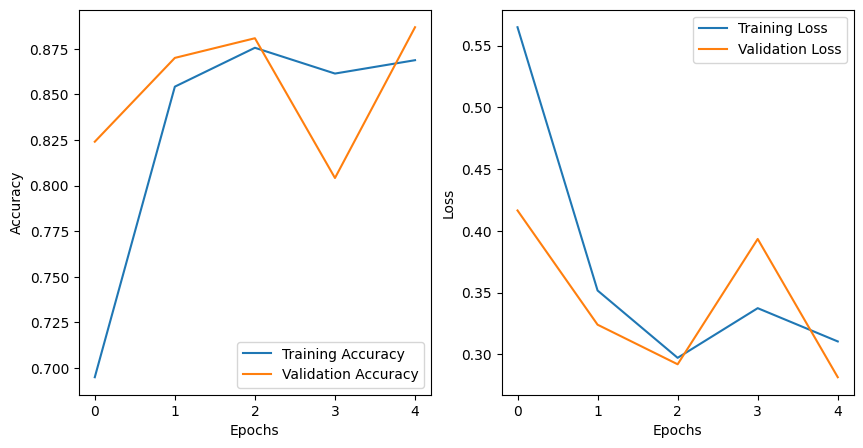

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

264/264 [==============================] - 119s 450ms/step - loss: 0.2543 - accuracy: 0.8968
Test Loss: 0.25427740812301636
Test Accuracy: 0.8968009352684021


In [32]:
from sklearn.metrics import classification_report

# Assuming you have imported or defined your model
predictions = model.predict(x_test)  # Assuming x_test is your test data

# Convert probabilities to class labels (0 or 1) based on a threshold (e.g., 0.5)
predicted_classes = (predictions > 0.5).astype(int)

# Now, you can generate the classification report
report = classification_report(y_test, predicted_classes, target_names=['0', '1'])
print(report)


264/264 [==============================] - 114s 429ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3833
           1       0.91      0.90      0.90      4607

   micro avg       0.90      0.89      0.90      8440
   macro avg       0.90      0.89      0.90      8440
weighted avg       0.90      0.89      0.90      8440
 samples avg       0.89      0.89      0.89      8440



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


264/264 [==============================] - 121s 457ms/step


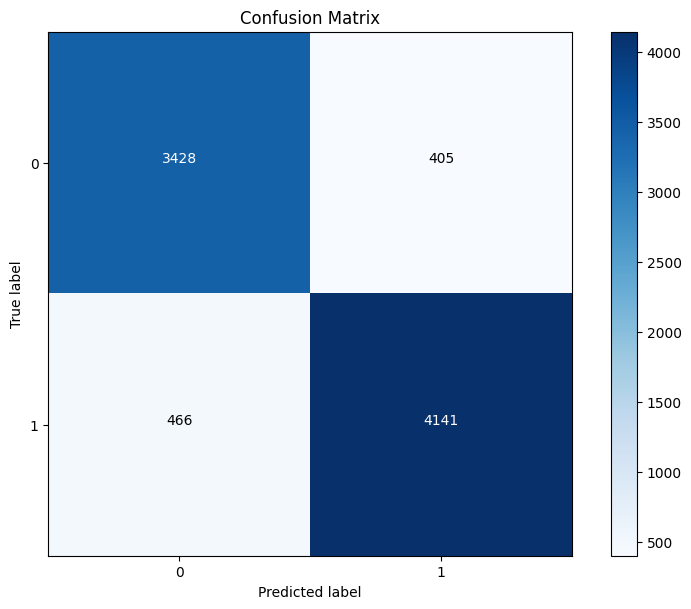

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test, axis=1)

# Assuming model.predict is used to get predicted probabilities
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(conf_matrix.shape[0])
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Add values inside the squares
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Average Matthews Correlation Coefficient: 0.791388211841835


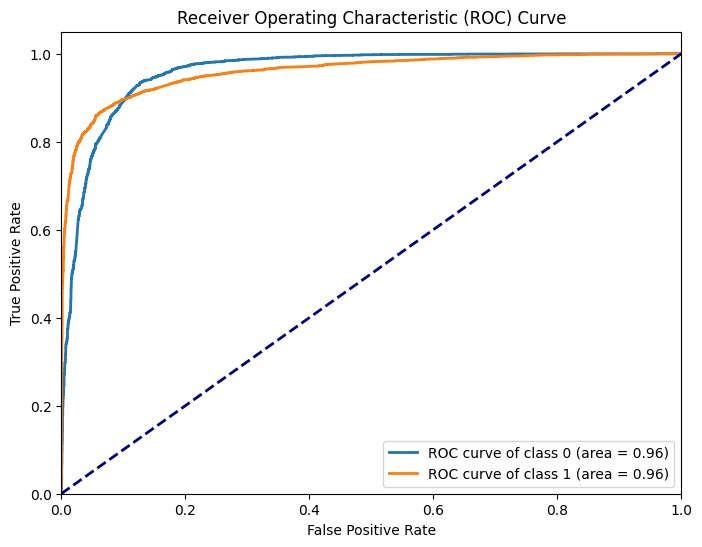

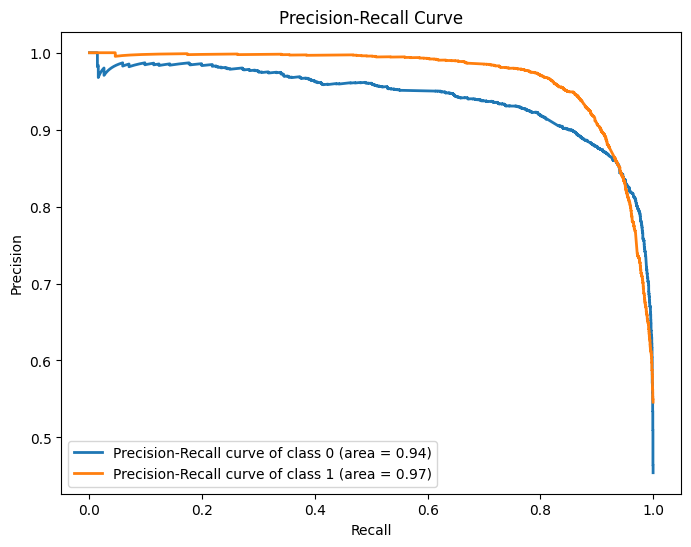

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef, roc_curve, auc, precision_recall_curve

# Assuming y_test and y_pred_prob are already defined

# Make sure the predicted probabilities are converted to binary labels
binary_predictions = (y_pred_prob > 0.5).astype('int32')

# Determine the number of classes dynamically
num_classes = y_test.shape[1]

# Calculate Matthews Correlation Coefficient (MCC) for each label
mcc_per_label = []
for i in range(num_classes):
    mcc_label = matthews_corrcoef(y_test[:, i], binary_predictions[:, i])
    mcc_per_label.append(mcc_label)

# Compute average MCC across all labels
mcc_average = np.mean(mcc_per_label)

print("Average Matthews Correlation Coefficient:", mcc_average)

# Compute ROC curve and ROC area for each label
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area under the curve for each label
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label='Precision-Recall curve of class {0} (area = {1:0.2f})'.format(i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


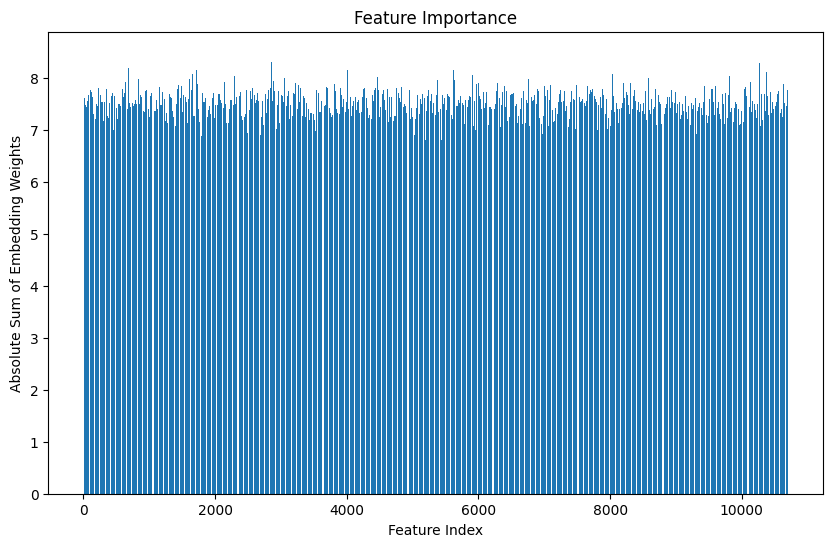

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model and embedding_weights are defined
embedding_weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of embedding weights for each feature
feature_importance = np.sum(np.abs(embedding_weights), axis=1)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Sum of Embedding Weights')
plt.title('Feature Importance')
plt.show()
